<a href="https://colab.research.google.com/github/AaronRM9416/Platform-Performance-Gaming-/blob/main/Platform_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Platform Sales and Review Scores

Aaron Musselwhite

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer              ##imports
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')

#Data Review and Cleaning

In [2]:
games= pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRJiyV_o3XPU0pvlMVCM8JrlpXl2hcP1hezOnFBGLQWZq3G0COBwVyOuakBhv31Lt9cgU18RSyBQpWp/pub?output=csv')
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df= games.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            95
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [8]:
df =df.drop(columns=['NA_Sales','EU_Sales','JP_Sales','User_Count','Critic_Count','Rating','Other_Sales','Name'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16719 non-null  object 
 1   Year_of_Release  16450 non-null  float64
 2   Genre            16717 non-null  object 
 3   Publisher        16665 non-null  object 
 4   Global_Sales     16719 non-null  float64
 5   Critic_Score     8137 non-null   float64
 6   User_Score       7590 non-null   float64
 7   Developer        10096 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1.0+ MB


#Early Visuals

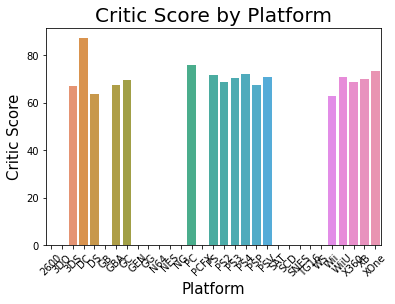

In [10]:
plat_group = df.groupby('Platform').mean().reset_index()

sns.barplot(data=plat_group, x='Platform', y='Critic_Score')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Critic Score by Platform', fontsize=20)
plt.xlabel('Platform', fontsize=15)
plt.ylabel('Critic Score', fontsize=15)
plt.xticks(rotation = 45);

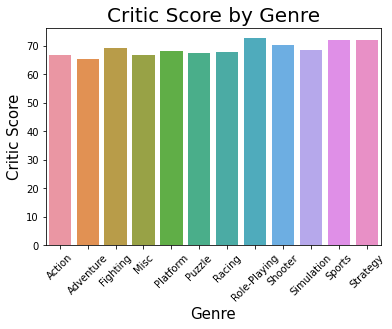

In [11]:
Genre_group = df.groupby('Genre').mean().reset_index()

sns.barplot(data=Genre_group, x='Genre', y='Critic_Score')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Critic Score by Genre', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Critic Score', fontsize=15)
plt.xticks(rotation = 45);

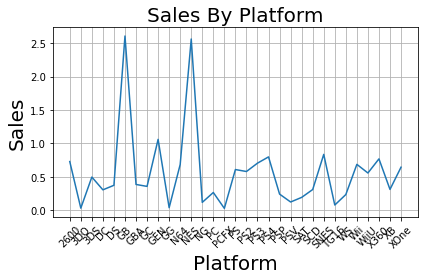

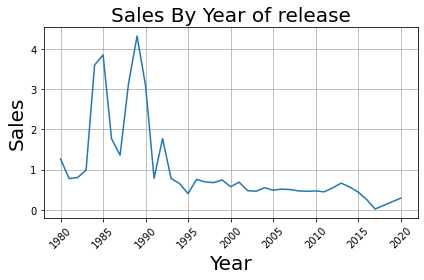

In [12]:
year_group = df.groupby('Year_of_Release').mean().reset_index()

fig, axes = plt.subplots(nrows = 1, ncols = 1)

axes.plot(plat_group['Platform'], plat_group['Global_Sales'])
axes.set_title('Sales By Platform', fontsize=20)
axes.set_ylabel('Sales', fontsize=20)
axes.set_xlabel("Platform", fontsize=20)
axes.grid()
plt.xticks(rotation = 45);
plt.tight_layout()
plt.show()





fig, axes = plt.subplots(nrows = 1, ncols = 1)

axes.plot(year_group['Year_of_Release'], year_group['Global_Sales'])
axes.set_title('Sales By Year of release', fontsize=20)
axes.set_ylabel('Sales', fontsize=20)
axes.set_xlabel("Year", fontsize=20)        
axes.grid()
plt.xticks(rotation = 45);
plt.tight_layout()
plt.show()

#X/Y Split & Preprocessing 

In [13]:
X = df.drop(columns=['Global_Sales'])
y = df['Global_Sales']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
num_select = make_column_selector(dtype_include='number')
cat_select = make_column_selector(dtype_include='object')

In [16]:
num_column = num_select(X_train)
cat_column = cat_select(X_train)
print('numeric columns are', num_column)
print('categorical columns are', cat_column)

numeric columns are ['Year_of_Release', 'Critic_Score', 'User_Score']
categorical columns are ['Platform', 'Genre', 'Publisher', 'Developer']


In [17]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [18]:
Stan_Scale = StandardScaler(with_mean=False)
OHE = OneHotEncoder(handle_unknown='ignore')

In [19]:
num_pipe = make_pipeline(mean_imputer, Stan_Scale)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler(with_mean=False))])

In [20]:
nom_pipe = make_pipeline(freq_imputer, OHE)
nom_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

In [21]:
num_tup_pro= (num_pipe, num_select)
nom_tup_pro= (nom_pipe, cat_select)

pre_pro = make_column_transformer(num_tup_pro, nom_tup_pro)
pre_pro

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e03410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e037d0>)])

# ***Regression Models***

In [22]:
def eval_regression(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

# Dummy

In [23]:
# instantiate a baseline model
dummy_reg = DummyRegressor(strategy='mean')


dummy_pipe = make_pipeline(pre_pro, dummy_reg)

dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e03410>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e037d0>)])),
                ('dummyregressor', DummyRegressor())])

In [24]:
train_pred = dummy_pipe.predict(X_train)
test_pred = dummy_pipe.predict(X_test)

In [25]:
train_pred

array([0.5278858, 0.5278858, 0.5278858, ..., 0.5278858, 0.5278858,
       0.5278858])

In [26]:
test_pred

array([0.5278858, 0.5278858, 0.5278858, ..., 0.5278858, 0.5278858,
       0.5278858])

In [27]:
eval_regression(y_train, train_pred)

MAE 0.5810835850015406,
 MSE 2.0278962000526617,
 RMSE: 1.4240422044492438,
 R^2: 0.0 


In [28]:
eval_regression(y_test, test_pred)

MAE 0.5974982540597736,
 MSE 3.50019067647153,
 RMSE: 1.870879653123506,
 R^2: -0.00014628295911300881 


# Linear Regression

In [29]:
reg = LinearRegression()
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [30]:
linreg_pipe = make_pipeline(pre_pro, reg)

In [31]:
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e03410>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e037d0>)])),
                ('linearregression', LinearRegression())])

In [32]:
training_predictions = linreg_pipe.predict(X_train)
test_predictions = linreg_pipe.predict(X_test)
training_predictions[:10]

array([ 1.14720647,  0.13076902,  0.3387544 ,  0.94051645,  0.22394151,
        0.06003144,  1.31518674, -0.08520345,  0.61551067,  0.69962799])

In [33]:
eval_regression(y_train, training_predictions)

MAE 0.43534743093333145,
 MSE 1.3065065041377053,
 RMSE: 1.1430251546390855,
 R^2: 0.3557330478237609 


In [34]:
eval_regression(y_test, test_predictions)  # due to high RMSE and low r2 scores this model is not working 

MAE 0.5410541898394035,
 MSE 2.886410858536826,
 RMSE: 1.6989440422029285,
 R^2: 0.17523547769443637 


# **Decision Tree Regressor**

In [35]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [36]:
dec_pipe = make_pipeline(pre_pro, dec_tree)

dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e03410>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e037d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [37]:
train_preds = dec_pipe.predict(X_train)
test_preds = dec_pipe.predict(X_test)

In [38]:
train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)            ##score shows very high bias

0.8964605827996525
0.3018761751743999


In [39]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [40]:
dec_tree.get_depth()

173

In [41]:
dec_tree.get_n_leaves()

10444

In [42]:
pre_pro.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e03410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e037d0>)])

In [43]:
X_train_pro = pre_pro.transform(X_train)
X_test_pro = pre_pro.transform(X_test)

In [53]:
dec_tree_150 = DecisionTreeRegressor(max_depth = 150, random_state = 42)
dec_tree_150.fit(X_train_pro, y_train)
train_150_score = dec_tree_150.score(X_train_pro, y_train)
test_150_score = dec_tree_150.score(X_test_pro, y_test)
print(train_15_score)
print(test_15_score)

0.8964605827996525
0.3018761751743999


In [48]:
depths = list(range(2, 173)) # will try every value between 2 and 173
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_pro, y_train)
    train_score = dec_tree.score(X_train_pro, y_train)
    test_score = dec_tree.score(X_test_pro, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

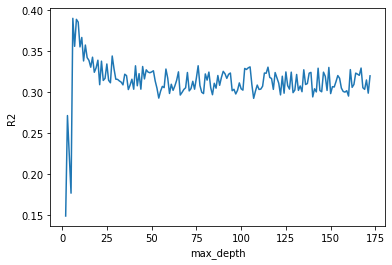

In [49]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');        # somewhere in the top 10 lies the best depth

In [50]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
6,0.390117,0.527679
8,0.388884,0.612767
9,0.38547,0.652881
11,0.366754,0.714144
13,0.357518,0.747851


In [75]:
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train_pro, y_train)
train_6_score = dec_tree_9.score(X_train_pro, y_train)
test_6_score = dec_tree_9.score(X_test_pro, y_test)     # found that 6 had the best depth and reduced the bias to a manageable level. Not incredibly accurate but fitting rather well
print(train_6_score)
print(test_6_score)

0.5276789720761869
0.3901173276211626


# **PCA**

In [65]:
ohe_2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
Spar_pipe = make_pipeline(freq_imputer, ohe_2) ## creating new pipe with different rules to handle PCA
Spar_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [66]:
Spar_tup_pro= (Spar_pipe, cat_select)
pre_pro = make_column_transformer(num_tup_pro, Spar_tup_pro)
pre_pro


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e03410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e037d0>)])

In [67]:
pre_pro.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e03410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4d2e037d0>)])

In [68]:
Xspar_train_pro = pre_pro.transform(X_train)
Xspar_test_pro = pre_pro.transform(X_test)

In [92]:
scaled_df = Stan_Scale.fit_transform(Xspar_test_pro)

In [108]:
pca = PCA(n_components=45)
pcs = pca.fit_transform(scaled_df)

In [109]:
pca85 = PCA(n_components=.95)

In [111]:
transformer = make_pipeline(Stan_Scale, PCA(n_components=45))

In [112]:
DTC_pipe = make_pipeline(transformer, dec_tree_6)
DTC_pipe.fit(Xspar_train_pro, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler',
                                  StandardScaler(with_mean=False)),
                                 ('pca', PCA(n_components=45))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=42))])

In [113]:
print('Training accuracy:', DTC_pipe.score(Xspar_train_pro, y_train))
print('Testing accuracy:', DTC_pipe.score(Xspar_test_pro, y_test))      #PCA only drove down my accuracy 

Training accuracy: 0.23169137520335426
Testing accuracy: 0.06564498465103208


# I have chosen to go with the Decision Tree model.  
 
Despite originally showing a high bias, by tuning some of the parameters i was able to bring that bias down and properly fit it to my data. Out of the testing models i chose it performed the best once i found the correct parameters